<a href="https://colab.research.google.com/github/sushmit86/Data_science_experiments/blob/master/Statistical_Rethinking/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Code 3.1
$Pr(vampire|positive) = \frac{P(positive|vampire)P(vampire)}{P(positive)} $
```
Applying Bayes Theorem
```

In [2]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
print(PrVP)

0.08683729433272395


### Code 3.2

In [3]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior
np.__version__

'1.18.4'

In [0]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)


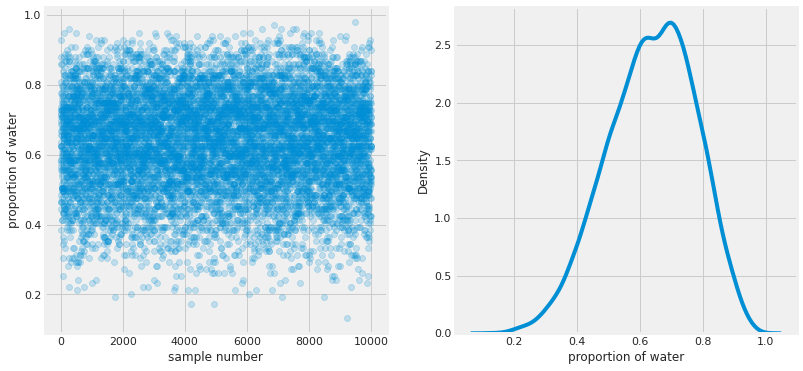

In [5]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples,'o',alpha=0.2)
ax0.set_xlabel('sample number')
ax0.set_ylabel('proportion of water')
sns.kdeplot(samples,ax =ax1)
ax1.set_xlabel('proportion of water')
ax1.set_ylabel('Density')
fig.show()